#　データから外壁境界をとってきて保存する

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# pngファイルのリスト取得
folder = 'floorplangen/floorplan_dataset'
files = [os.path.join(folder, filename) for filename in os.listdir(folder) if filename.endswith(".png")]
files[0]

'floorplangen/floorplan_dataset/20037.png'

In [6]:
from raster_to_json import raster_to_json
from read_dd import read_data
import mask_to_poly as mr
img =read_data(files[0])

In [7]:
img.shape[]

(256, 256, 4)

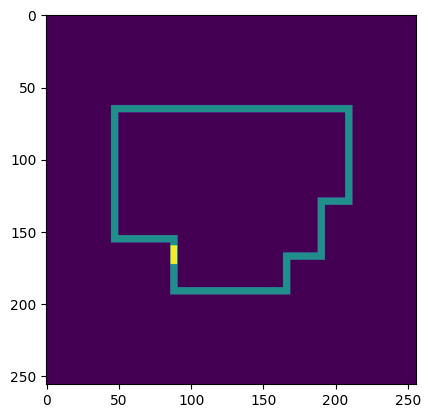

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img[:, :, 0])

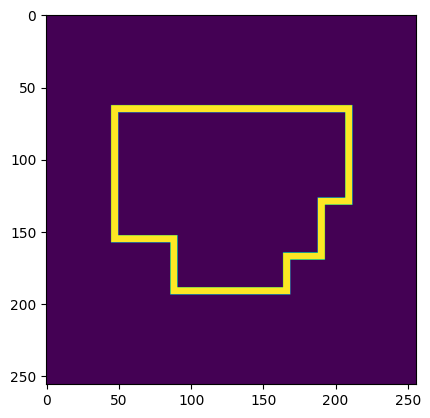

In [23]:
import numpy as np
exterior_mask = (img[:, :, 0] > 0).astype(np.uint8)
plt.imshow(exterior_mask)

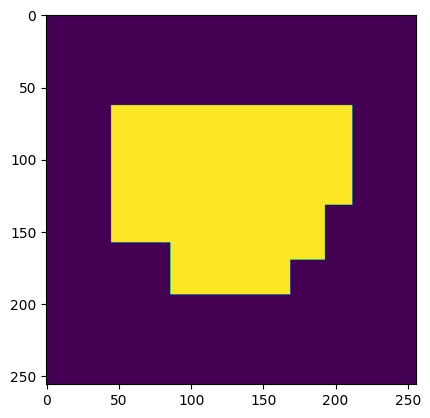

In [25]:
from scipy.ndimage import binary_fill_holes
filled_mask = binary_fill_holes(exterior_mask).astype(np.uint8)
plt.imshow(filled_mask)

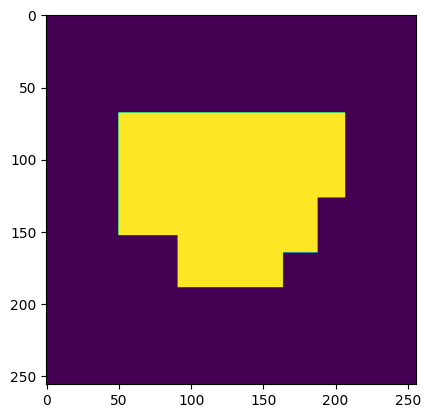

In [41]:
# 内側だけmaskを作る (fillした画像 - 外壁のmask)
interior_mask = filled_mask - exterior_mask
plt.imshow(interior_mask)

In [42]:
boundary_coords = mr.get_polygon(interior_mask).exterior.coords

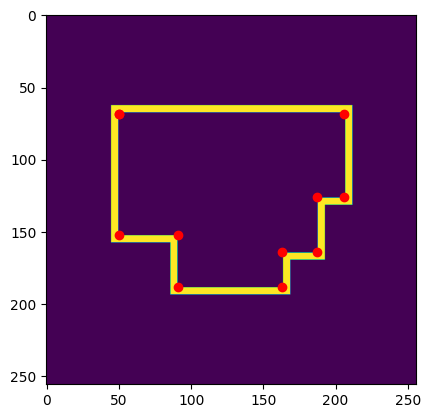

In [43]:
plt.imshow(exterior_mask)
x, y = zip(*boundary_coords)
plt.plot(y, x, 'ro') 

In [44]:
list(boundary_coords)

[(68.0, 50.0),
 (152.0, 50.0),
 (152.0, 91.0),
 (188.0, 91.0),
 (188.0, 163.0),
 (164.0, 163.0),
 (164.0, 187.0),
 (126.0, 187.0),
 (126.0, 206.0),
 (68.0, 206.0),
 (68.0, 50.0)]

In [56]:
info = raster_to_json(files[1],print_door_warning=False, save=False)

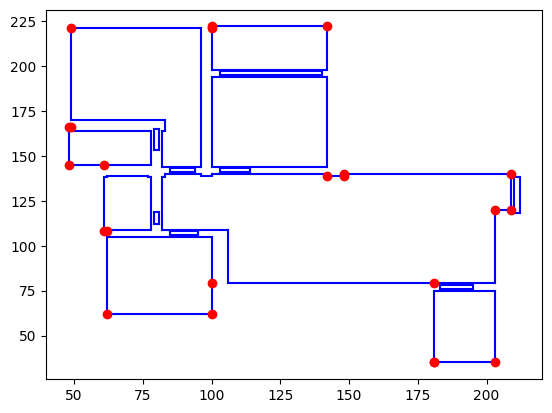

In [57]:
for edge in info['edges']:
    x1, y1, x2, y2, _, _ = edge
    plt.plot([x1, x2], [y1, y2], 'b-')
x, y = zip(*info['boundary_coords'])
plt.plot(x, y, 'ro') 